In [85]:
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
#Train_test split
from sklearn.model_selection import train_test_split
#linear regression import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support
#Gradient Boosting Regression
from sklearn import ensemble
#Decision Tree:
from sklearn.tree import DecisionTreeRegressor
#Artificial Neural Networks
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('housing_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
'''x_train = data_train[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']] '''

"x_train = data_train[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',\n       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',\n       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\n       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',\n       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',\n       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',\n       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',\n       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',\n       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',\n       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',\n       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',\n       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',\n       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',\n   

In [6]:
x = data[['MSSubClass','LotArea', 'Street','LotShape', 'LandContour', 'Heating' , 'OverallCond', 'YearBuilt','ScreenPorch','MSZoning', 'LotFrontage', 
        'Utilities','LotConfig', 'LandSlope', 'Neighborhood' , 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'OverallQual', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType' ,  'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
        'BsmtExposure', 'BsmtFinType1','BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF' , 'HeatingQC', 'CentralAir','Electrical', 
        '1stFlrSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 'KitchenQual', 
        'TotRmsAbvGrd','Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish','GarageCars', 'GarageArea',
        'GarageQual', 'GarageCond', 'PavedDrive' , 'WoodDeckSF', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
y = data[['SalePrice']]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=22)

In [8]:
x_train['MSZoning'].unique()
combine=[x_train,x_test]
zonemapping={'RL': 0,'RH': 1,'RM': 2,'FV': 3,'C(all)': 4}
for dt in combine:
    dt['MSZoning']=data['MSZoning'].map(zonemapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [9]:
# x_train['Alley'].unique()
# combine=[x_train,x_test]
# alleymapping={'Pave': 1,'Grvl': 2}
# for dt in combine:
#     dt['Alley']=data['Alley'].map(alleymapping)
# x_train.head()

In [10]:
x_train['Utilities'].unique()
combine=[x_train,x_test]
utilmapping={'AllPub':0,'NoSeWa': 1}
for dt in combine:
    dt['Utilities']=data['Utilities'].map(utilmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [11]:
x_train['LotConfig'].unique()
combine=[x_train,x_test]
lotmapping={'Inside':0,'Corner':1, 'CulDSac':2, 'FR3':3, 'FR2':4 }
for dt in combine:
    dt['LotConfig']=data['LotConfig'].map(lotmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [12]:
x_train['LandSlope'].unique()
combine=[x_train,x_test]
landmapping={'Gtl':0,'Mod':1, 'Sev':2}
for dt in combine:
    dt['LandSlope']=data['LandSlope'].map(landmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [13]:
x_train['Neighborhood'].unique()
combine=[x_train,x_test]
neighmapping={'Gilbert': 0,'SawyerW': 1,'CollgCr': 2,'Edwards': 3,'NAmes': 4, 'Blmngtn': 5,
             'Somerst': 6, 'NridgHt': 7, 'Timber': 8, 'OldTown': 9, 'NWAmes': 10, 'MeadowV': 11,
             'ClearCr': 12, 'NPkVill': 13, 'Crawfor': 14, 'BrkSide': 15, 'IDOTRR': 16, 'BrDale': 17,
             'Sawyer': 18, 'Mitchel': 19, 'NoRidge': 20, 'Veenker': 21, 'StoneBr': 22, 'Blueste': 23,
             'SWISU': 24}
for dt in combine:
    dt['Neighborhood']=data['Neighborhood'].map(neighmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [14]:
x_train['Condition1'].unique()
combine=[x_train,x_test]
cond1mapping={'Norm': 0,'Feedr': 1,'PosN': 2,'PosA': 3,'Artery': 4, 'RRAn': 5,
             'RRNn': 6, 'RRAe': 7}
for dt in combine:
    dt['Condition1']=data['Condition1'].map(cond1mapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [15]:
x_train['Condition2'].unique()
combine=[x_train,x_test]
cond2mapping={'Norm': 0,'Feedr': 1,'RRAn': 2,'Artery': 3,'RRNn': 4, 'PosN': 5,
             'RRAe': 6}
for dt in combine:
    dt['Condition2']=data['Condition2'].map(cond2mapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [16]:
x_train['BldgType'].unique()
combine=[x_train,x_test]
bldgmapping={'1Fam': 0,'Twnhs': 1,'TwnhsE': 2,'2fmCon': 3,'Duplex': 4}
for dt in combine:
    dt['BldgType']=data['BldgType'].map(bldgmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [17]:
x_train['HouseStyle'].unique()
combine=[x_train,x_test]
hstylemapping={'2Story': 0,'1.5Unf': 1,'1Story': 2,'1.5Fin': 3,'SFoyer': 4, 'SLvl': 5, '2.5Fin': 6,
              '2.5Unf': 7}
for dt in combine:
    dt['HouseStyle']=data['HouseStyle'].map(hstylemapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [18]:
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [19]:
x_train['RoofStyle'].unique()
combine=[x_train,x_test]
rstylemapping={'Gable': 0,'Hip': 1,'Flat': 2,'Gambrel': 3,'Mansard': 4, 'Shed': 5}
for dt in combine:
    dt['RoofStyle']=data['RoofStyle'].map(rstylemapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [20]:
x_train['RoofMatl'].unique()
combine=[x_train,x_test]
rmatlmapping={'CompShg': 0,'Tar&Grv': 1,'WdShake': 2,'WdShngl': 3,'Roll': 4, 'ClyTile': 5, 'Membran': 6, 'Metal':7}
for dt in combine:
    dt['RoofMatl']=data['RoofMatl'].map(rmatlmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [21]:
x_train['Exterior1st'].unique()
combine=[x_train,x_test]
ext1mapping={'VinylSd': 0,'Wd Sdng': 1,'MetalSd': 2,'HdBoard': 3,'AsbShng': 4, 'Plywood': 5, 'CemntBd': 6, 'Stucco':7,
             'WdShing': 8, 'BrkFace': 9, 'ImStucc': 10, 'Stone': 11, 'CBlock': 12, 'BrkComm': 13}
for dt in combine:
    dt['Exterior1st']=data['Exterior1st'].map(ext1mapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [22]:
x_train['Exterior2nd'].unique()
combine=[x_train,x_test]
extndmapping={'VinylSd': 0,'Wd Sdng': 1,'MetalSd': 2,'HdBoard': 3,'AsbShng': 4, 'Plywood': 5, 'CemntBd': 6, 'Stucco':7,
             'BrkFace': 8, 'Wd Shng': 9, 'ImStucc': 10, 'Stone': 11, 'Brk Cmn': 12, 'CBlock': 13, 'AsphShn':14, 'Other':15}
for dt in combine:
    dt['Exterior2nd']=data['Exterior2nd'].map(extndmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [23]:
x_train['MasVnrType'].unique()
combine=[x_train,x_test]
mvtmapping={'None': 4,'BrkFace': 1,'Stone': 2,'BrkCmn': 3,'nan': 0}
for dt in combine:
    dt['MasVnrType']=data['MasVnrType'].map(mvtmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [24]:
x_train['ExterQual'].unique()
combine=[x_train,x_test]
eqmapping={'Gd': 0,'TA': 1,'Ex': 2,'Fa': 3}
for dt in combine:
    dt['ExterQual']=data['ExterQual'].map(eqmapping)
x_train.head()


,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [25]:
x_train['ExterCond'].unique()
combine=[x_train,x_test]
ecmapping={'TA': 0,'Gd': 1,'Fa': 2,'Po': 3}
for dt in combine:
    dt['ExterCond']=data['ExterCond'].map(ecmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [26]:
x_train['Foundation'].unique()
combine=[x_train,x_test]
foundmapping={'PConc': 0,'BrkTil': 1,'CBlock': 2,'Stone': 3, 'Slab': 4, 'Wood': 5}
for dt in combine:
    dt['Foundation']=data['Foundation'].map(foundmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [27]:
x_train['BsmtQual'].unique()
combine=[x_train,x_test]
bqmapping={'Gd': 4,'Fa': 1,'TA': 2,'Ex': 3, 'nan': 0}
for dt in combine:
    dt['BsmtQual']=data['BsmtQual'].map(bqmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [28]:
x_train['BsmtCond'].unique()
combine=[x_train,x_test]
bcmapping={'TA': 3,'Fa': 1,'Gd': 2,'nan': 0, 'Po': 4}
for dt in combine:
    dt['BsmtCond']=data['BsmtCond'].map(bcmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [29]:
x_train['BsmtExposure'].unique()
combine=[x_train,x_test]
bsmtmapping={'nan': 0,'Av': 1,'No': 2,'Gd': 3, 'Mn': 4}
for dt in combine:
    dt['BsmtExposure']=data['BsmtExposure'].map(bsmtmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [30]:
x_train['BsmtFinType1'].unique()
combine=[x_train,x_test]
bsmtftmapping={'nan': 0,'Unf': 1,'GLQ': 2,'ALQ': 3, 'BLQ': 4, 'Rec': 5, 'LwQ': 6}
for dt in combine:
    dt['BsmtFinType1']=data['BsmtFinType1'].map(bsmtftmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [31]:
x_train['BsmtFinType2'].unique()
combine=[x_train,x_test]
bsmtfttypemapping={'nan': 0,'Unf': 1,'Rec': 2,'LwQ': 3, 'GLQ': 4, 'ALQ': 5, 'BLQ': 6}
for dt in combine:
    dt['BsmtFinType2']=data['BsmtFinType2'].map(bsmtfttypemapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [32]:
x_train['HeatingQC'].unique()
combine=[x_train,x_test]
heatqcmapping={'Ex': 0,'TA': 1,'Gd': 2,'Fa': 3, 'Po': 4}
for dt in combine:
    dt['HeatingQC']=data['HeatingQC'].map(heatqcmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [33]:
x_train['CentralAir'].unique()
combine=[x_train,x_test]
centralamapping={'N': 0,'Y': 1}
for dt in combine:
    dt['CentralAir']=data['CentralAir'].map(centralamapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [34]:
x_train['Electrical'].unique()
combine=[x_train,x_test]
electmapping={'nan': 0,'SBrkr': 1, 'FuseA': 2, 'FuseP': 3, 'FuseF': 4, 'Mix': 5}
for dt in combine:
    dt['Electrical']=data['Electrical'].map(electmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [35]:
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [36]:
x_train['KitchenQual'].unique()
combine=[x_train,x_test]
kqmapping={'Gd': 0,'TA': 1, 'Ex': 2, 'Fa': 3}
for dt in combine:
    dt['KitchenQual']=data['KitchenQual'].map(kqmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [37]:
x_train['Functional'].unique()
combine=[x_train,x_test]
funmapping={'Typ': 0,'Maj1': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj2': 5, 'Sev': 6}
for dt in combine:
    dt['Functional']=data['Functional'].map(funmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [38]:
x_train['FireplaceQu'].unique()
combine=[x_train,x_test]
fireqmapping={'nan': 0,'Gd': 1, 'TA': 2, 'Ex': 3, 'Po': 4, 'Fa': 5}
for dt in combine:
    dt['FireplaceQu']=data['FireplaceQu'].map(fireqmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [39]:
x_train['GarageType'].unique()
combine=[x_train,x_test]
garagetmapping={'nan': 0,'BuiltIn': 1, 'Detchd': 2, 'Attchd': 3, 'Basment': 4, 'CarPort': 5, '2Types': 6}
for dt in combine:
    dt['GarageType']=data['GarageType'].map(garagetmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [40]:
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [41]:
x_train['GarageFinish'].unique()
combine=[x_train,x_test]
garagefmapping={'nan': 0,'Fin': 1, 'Unf': 2, 'RFn': 3}
for dt in combine:
    dt['GarageFinish']=data['GarageFinish'].map(garagefmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,TA,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,TA,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,TA,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,TA,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,TA,TA,Y,184,0,6,2009,WD,Normal


In [42]:
x_train['GarageQual'].unique()
combine=[x_train,x_test]
garagequmapping={'nan': 0,'TA': 1, 'Fa': 2, 'Gd': 3, 'Po':4, 'Ex':5}
for dt in combine:
    dt['GarageQual']=data['GarageQual'].map(garagequmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,TA,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,TA,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,TA,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,TA,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,TA,Y,184,0,6,2009,WD,Normal


In [43]:
x_train['GarageCond'].unique()
combine=[x_train,x_test]
garagecomapping={'nan': 0,'TA': 1, 'Fa': 2, 'Gd': 3, 'Po':4, 'Ex':5}
for dt in combine:
    dt['GarageCond']=data['GarageCond'].map(garagecomapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,1.0,Y,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,1.0,Y,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,1.0,Y,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,1.0,Y,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,1.0,Y,184,0,6,2009,WD,Normal


In [44]:
x_train['PavedDrive'].unique()
combine=[x_train,x_test]
pdmapping={'N': 0,'Y': 1, 'P': 2}
for dt in combine:
    dt['PavedDrive']=data['PavedDrive'].map(pdmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,WD,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,WD,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,WD,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,WD,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,WD,Normal


In [45]:
# x_train['PoolQC'].unique()
# combine=[x_train,x_test]
# poolqmapping={'nan': 0,'Gd': 1, 'Fa': 2, 'Ex': 3}
# for dt in combine:
#     dt['PoolQC']=data['PoolQC'].map(poolqmapping)
# x_train.head()

In [46]:
# x_train['Fence'].unique()
# combine=[x_train,x_test]
# fencemapping={'nan': 0,'GdWo': 1, 'MnPrv': 2, 'GdPrv': 3, 'MnWw':4}
# for dt in combine:
#     dt['Fence']=data['Fence'].map(fencemapping)
# x_train.head()

In [47]:
# x_train['MiscFeature'].unique()
# combine=[x_train,x_test]
# miscfmapping={'nan': 0,'Shed': 1, 'TenC': 2, 'Gar2': 3, 'Othr':4}
# for dt in combine:
#     dt['MiscFeature']=data['MiscFeature'].map(miscfmapping)
# x_train.head()

In [48]:
x_train['SaleType'].unique()
combine=[x_train,x_test]
saletypemapping={'WD': 0,'New': 1, 'COD': 2, 'CWD': 3, 'ConLw': 4, 'Oth': 5, 'ConLI': 6, 'ConLD': 7, 'Con': 8}
for dt in combine:
    dt['SaleType']=data['SaleType'].map(saletypemapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,Normal
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,Normal
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,Normal
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,Normal
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,Normal


In [49]:
x_train['SaleCondition'].unique()
combine=[x_train,x_test]
saleconmapping={'Normal': 0,'Partial': 1, 'Abnorml': 2, 'Family': 3, 'Alloca': 4, 'AdjLand': 5}
for dt in combine:
    dt['SaleCondition']=data['SaleCondition'].map(saleconmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,0
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,0
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,0
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,0
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,0


In [50]:
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,Pave,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,0
142,50,8520,Pave,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,0
28,20,16321,Pave,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,0
1333,50,7200,Pave,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,0
877,60,8834,Pave,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,0


In [51]:
x_train['Street'].unique()
combine=[x_train,x_test]
streetmapping={'Pave':0,'Grvl': 1}
for dt in combine:
   dt['Street']=data['Street'].map(streetmapping)
x_train.head() 

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,0,Reg,Lvl,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,0
142,50,8520,0,Reg,Lvl,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,0
28,20,16321,0,IR1,Lvl,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,0
1333,50,7200,0,Reg,Lvl,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,0
877,60,8834,0,Reg,Lvl,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,0


In [52]:
x_train['LandContour'].unique()
combine=[x_train,x_test]
landmapping={'Lvl':0,'Bnk': 1,'Low': 2,'HLS': 3}
for dt in combine:
   dt['LandContour']=data['LandContour'].map(landmapping)
x_train

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,0,Reg,0,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,0
142,50,8520,0,Reg,0,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,0
28,20,16321,0,IR1,0,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,0
1333,50,7200,0,Reg,0,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,0
877,60,8834,0,Reg,0,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,0
900,20,7340,0,IR1,0,GasA,6,1971,0,0.0,...,684,1.0,1.0,1,0,0,6,2007,0,0
804,20,9000,0,Reg,0,GasA,5,1954,0,0.0,...,286,1.0,1.0,1,0,0,6,2006,0,3
1236,160,2628,0,Reg,0,GasA,5,2003,0,0.0,...,474,1.0,1.0,1,0,0,6,2010,0,0
253,80,9350,0,Reg,0,GasA,7,1964,0,0.0,...,309,1.0,1.0,1,333,0,10,2007,3,0
420,90,7060,0,Reg,0,GasA,5,1997,0,2.0,...,784,1.0,1.0,1,0,0,11,2008,0,4


In [53]:
x_train['LotShape'].unique()
combine=[x_train,x_test]
lotmapping={'Reg':0,'IR1': 1,'IR2': 2,'IR3': 3}
for dt in combine:
   dt['LotShape']=data['LotShape'].map(lotmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,0,0,0,GasA,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,0
142,50,8520,0,0,0,GasA,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,0
28,20,16321,0,1,0,GasA,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,0
1333,50,7200,0,0,0,GasA,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,0
877,60,8834,0,0,0,GasA,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,0


In [54]:
x_train['Heating'].unique()
combine=[x_train,x_test]
heatmapping={'GasA':0,'GasW': 1,'Grav': 2,'Wall': 3,'OthW': 4,'Floor': 5}
for dt in combine:
   dt['Heating']=data['Heating'].map(heatmapping)
x_train.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,0,0,0,0,5,1984,90,0.0,...,264,1.0,1.0,1,353,0,2,2010,0,0
142,50,8520,0,0,0,0,4,1952,0,0.0,...,720,1.0,1.0,1,0,0,6,2010,0,0
28,20,16321,0,1,0,0,6,1957,0,0.0,...,319,1.0,1.0,1,288,0,12,2006,0,0
1333,50,7200,0,0,0,0,6,1938,0,2.0,...,297,1.0,1.0,1,0,0,7,2006,0,0
877,60,8834,0,0,0,0,5,2004,0,0.0,...,738,1.0,1.0,1,184,0,6,2009,0,0


In [55]:
x_train.isna()
x_train.fillna(x_train.mean(), inplace=True)
# x_train = x_train.fillna(0)
x_train

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
372,120,7175,0,0,0,0,5,1984,90,0.000000,...,264,1.000000,1.000000,1,353,0,2,2010,0,0
142,50,8520,0,0,0,0,4,1952,0,0.000000,...,720,1.000000,1.000000,1,0,0,6,2010,0,0
28,20,16321,0,1,0,0,6,1957,0,0.000000,...,319,1.000000,1.000000,1,288,0,12,2006,0,0
1333,50,7200,0,0,0,0,6,1938,0,2.000000,...,297,1.000000,1.000000,1,0,0,7,2006,0,0
877,60,8834,0,0,0,0,5,2004,0,0.000000,...,738,1.000000,1.000000,1,184,0,6,2009,0,0
900,20,7340,0,1,0,0,6,1971,0,0.000000,...,684,1.000000,1.000000,1,0,0,6,2007,0,0
804,20,9000,0,0,0,0,5,1954,0,0.000000,...,286,1.000000,1.000000,1,0,0,6,2006,0,3
1236,160,2628,0,0,0,0,5,2003,0,0.000000,...,474,1.000000,1.000000,1,0,0,6,2010,0,0
253,80,9350,0,0,0,0,7,1964,0,0.000000,...,309,1.000000,1.000000,1,333,0,10,2007,3,0
420,90,7060,0,0,0,0,5,1997,0,2.000000,...,784,1.000000,1.000000,1,0,0,11,2008,0,4


In [56]:
x_test.isna()
x_test.fillna(x_test.mean(), inplace=True)
# x_test = x_test.fillna(0)
x_test

,MSSubClass,LotArea,Street,LotShape,LandContour,Heating,OverallCond,YearBuilt,ScreenPorch,MSZoning,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1159,60,9120,0,0,0,0,6,1974,0,0.0,...,540,3.00,1.000000,1,0,0,7,2008,0,0
866,20,10656,0,1,3,0,5,2006,0,0.0,...,870,1.00,1.000000,1,192,0,11,2007,1,1
432,160,1920,0,0,0,0,5,1971,0,2.0,...,440,1.00,1.000000,1,240,0,8,2007,0,0
798,60,13518,0,0,0,0,5,2008,0,0.0,...,820,1.00,1.000000,1,144,0,7,2009,1,1
1287,20,36500,0,1,2,0,5,1964,0,0.0,...,390,1.00,1.000000,0,168,0,6,2006,0,0
1257,30,4060,0,0,0,0,8,1922,0,0.0,...,0,1.05,1.035714,1,0,0,7,2009,0,0
458,70,5100,0,0,0,0,7,1925,0,2.0,...,228,1.00,1.000000,1,192,0,6,2008,0,0
1008,20,12118,0,1,0,0,5,2004,180,0.0,...,550,1.00,1.000000,1,100,0,4,2009,0,0
1373,20,11400,0,0,0,0,5,2001,0,0.0,...,804,1.00,1.000000,1,314,0,3,2007,0,0
187,50,10410,0,0,0,0,7,1916,0,0.0,...,180,2.00,2.000000,0,0,0,8,2009,0,0


In [57]:
# y_train = y_train.fillna(0)
y_train.fillna(y_train.mean(), inplace=True)
y_train

,SalePrice
372,125000
142,166000
28,207500
1333,125500
877,350000
900,110000
804,118000
1236,175500
253,158000
420,206300


In [58]:
# y_test = y_test.fillna(0)
y_test.fillna(y_test.mean(), inplace=True)
y_test

,SalePrice
1159,185000
866,248900
432,122500
798,485000
1287,190000
1257,99900
458,161000
1008,240000
1373,466500
187,135000


In [59]:
x_train = x_train.astype('int32')
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 372 to 885
Data columns (total 65 columns):
MSSubClass       1314 non-null int32
LotArea          1314 non-null int32
Street           1314 non-null int32
LotShape         1314 non-null int32
LandContour      1314 non-null int32
Heating          1314 non-null int32
OverallCond      1314 non-null int32
YearBuilt        1314 non-null int32
ScreenPorch      1314 non-null int32
MSZoning         1314 non-null int32
LotFrontage      1314 non-null int32
Utilities        1314 non-null int32
LotConfig        1314 non-null int32
LandSlope        1314 non-null int32
Neighborhood     1314 non-null int32
Condition1       1314 non-null int32
Condition2       1314 non-null int32
BldgType         1314 non-null int32
HouseStyle       1314 non-null int32
OverallQual      1314 non-null int32
YearRemodAdd     1314 non-null int32
RoofStyle        1314 non-null int32
RoofMatl         1314 non-null int32
Exterior1st      1314 non-null int32
Exte

In [60]:
x_test = x_test.astype('int32')
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1159 to 714
Data columns (total 65 columns):
MSSubClass       146 non-null int32
LotArea          146 non-null int32
Street           146 non-null int32
LotShape         146 non-null int32
LandContour      146 non-null int32
Heating          146 non-null int32
OverallCond      146 non-null int32
YearBuilt        146 non-null int32
ScreenPorch      146 non-null int32
MSZoning         146 non-null int32
LotFrontage      146 non-null int32
Utilities        146 non-null int32
LotConfig        146 non-null int32
LandSlope        146 non-null int32
Neighborhood     146 non-null int32
Condition1       146 non-null int32
Condition2       146 non-null int32
BldgType         146 non-null int32
HouseStyle       146 non-null int32
OverallQual      146 non-null int32
YearRemodAdd     146 non-null int32
RoofStyle        146 non-null int32
RoofMatl         146 non-null int32
Exterior1st      146 non-null int32
Exterior2nd      146 non-nul

In [94]:
regr = LinearRegression()
regr.fit(x_train,y_train)
pred = regr.predict(x_test)
print('prediction:',str(pred[4]).strip('[').strip(']'))
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('r2 score: %.2f' % r2_score(y_test,pred))
lrs = r2_score(y_test,pred)
accuracy = regr.score(x_test, y_test)
print(accuracy*100,'%')
df1 = pd.DataFrame({'Actual': y_test['SalePrice'].to_numpy().flatten(),'Predicted':pred.flatten()})
df1.head(5)

prediction: 189322.52367728
Coefficients: 
 [[-2.16497987e+02  4.65873280e-01 -3.64487596e+04 -2.55166266e+02
   1.11804001e+03  2.77230184e+02  5.32007381e+03  5.47839477e+02
   5.60287398e+01 -1.50725312e+03 -5.08214278e+01 -3.41562206e+04
   3.48873788e+02  5.11346348e+03  9.77926272e+02 -2.85885830e+03
  -1.73288572e+04  1.80825297e+03  1.26844681e+02  1.67734513e+04
   2.03214387e+02  3.73629543e+03 -1.03034348e+04  1.01466214e+03
  -1.08734986e+03 -9.96949909e+01  3.87321591e+03  3.74499108e+02
  -3.62475125e+03 -4.11369397e+03  2.32375084e+03  2.17595316e+03
   3.06832592e+02  6.65084775e+00 -2.52460658e+02  4.93722246e+00
  -2.28209277e+03 -6.16132593e+03  2.77225594e+03  1.80550126e+00
   5.30080607e+01  1.02362224e+04  5.13880910e+03  6.42117779e+03
  -5.87749514e+02 -8.51268198e+03 -1.23892105e+04  9.14659756e+03
   2.93907198e+03 -4.26792262e+03  4.17160355e+03 -1.37871622e+03
  -3.54710000e+03 -9.03454254e+02  1.23803314e+04  3.72710910e+00
   9.34509610e+03 -6.28889954e+0

,Actual,Predicted
0,185000,202864.563247
1,248900,255762.237631
2,122500,142405.683167
3,485000,401471.241060
4,190000,189322.523677


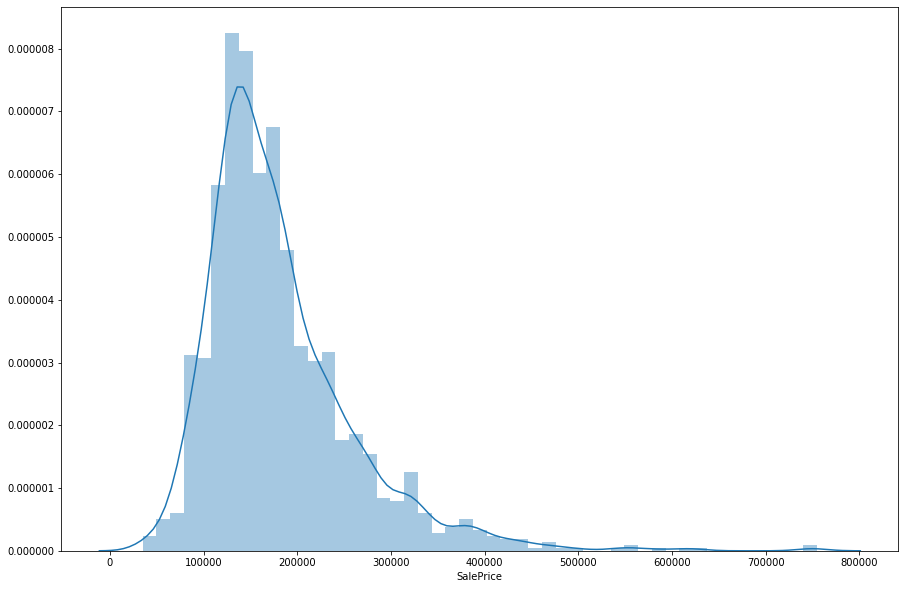

In [95]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(data['SalePrice'])

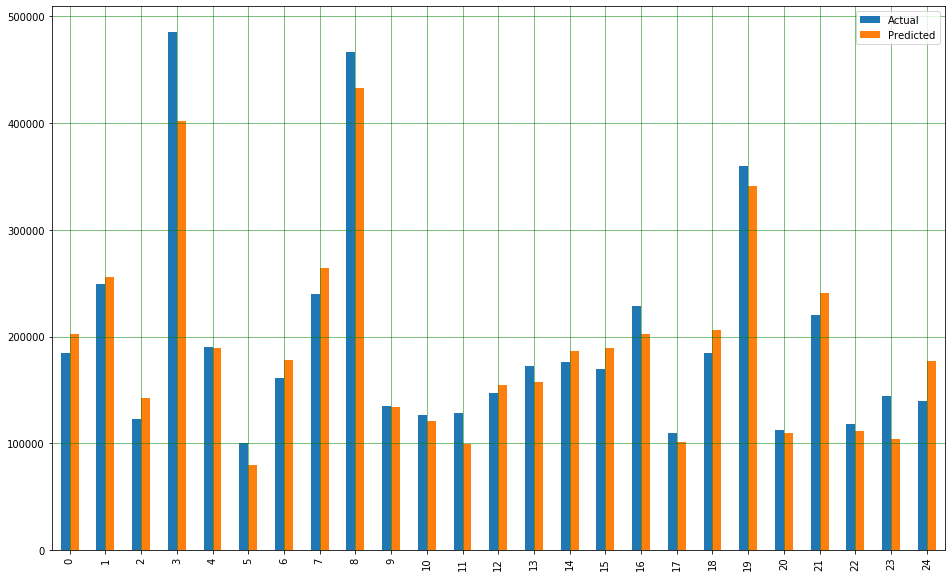

In [62]:
df1 = pd.DataFrame({'Actual': y_test['SalePrice'].to_numpy().flatten(),'Predicted':pred.flatten()})
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [77]:
clf_GB = ensemble.GradientBoostingRegressor()
clf_GB.fit(x_train, y_train)
predict_GB = clf_GB.predict(x_test)
print('prediction:',str(predict_GB[4]).strip('[').strip(']'))
print('r2 score: %.2f' % r2_score(y_test,predict_GB))
grs = r2_score(y_test,predict_GB)
accuracy = clf_GB.score(x_test, y_test)
print(accuracy*100,'%')
y_test_num = y_test['SalePrice'].to_numpy()
dfc=pd.DataFrame({'Actual':y_test_num, 'Predicted':predict_GB})
dfc


prediction: 193588.56904716004
Mean squared error: 541117846.44
Variance score: 0.91
91.32523029925083 %


,Actual,Predicted
0,185000,177936.581178
1,248900,262847.744021
2,122500,112369.424101
3,485000,520662.993791
4,190000,193588.569047
5,99900,88162.005518
6,161000,181101.450924
7,240000,236463.954209
8,466500,440754.844026
9,135000,124959.466648


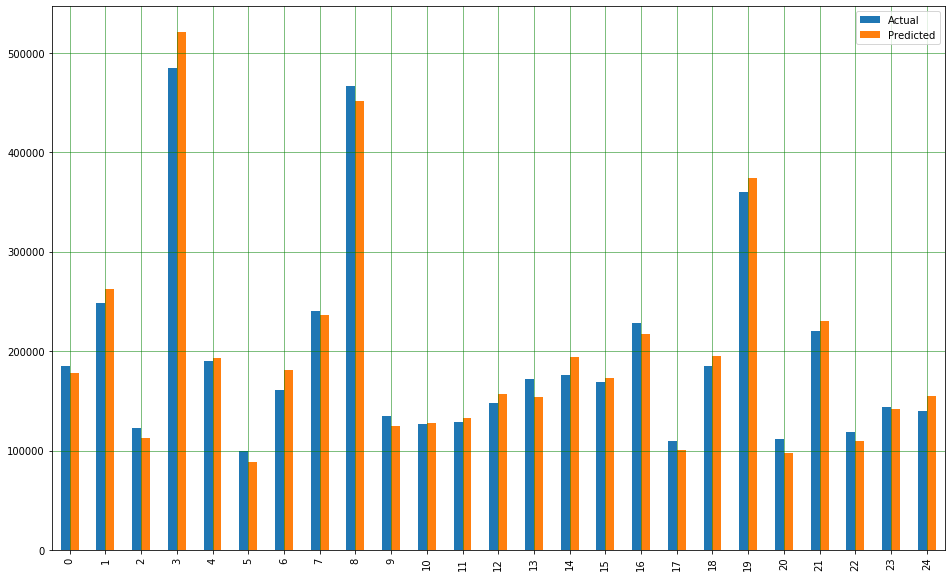

In [68]:
df1 = pd.DataFrame({'Actual': y_test['SalePrice'].to_numpy().flatten(),'Predicted':predict_GB.flatten()})
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [78]:
clf_DT=DecisionTreeRegressor(random_state=10, max_depth=5,presort=True)
clf_DT.fit(x_train,y_train)
predict=clf_DT.predict(x_test)
print('prediction:',str(predict[4]).strip('[').strip(']'))
print('r2 score: %.2f' % r2_score(y_test,predict))
drs = r2_score(y_test,predict)
accuracy = clf_DT.score(x_test, y_test)
print(accuracy*100,'%')
y_test_numpy = y_test['SalePrice'].to_numpy()
df=pd.DataFrame({'Actual':y_test_numpy, 'Predicted':predict})
df

prediction: 181836.73821989528
Mean squared error: 1259520377.26
Variance score: 0.80
79.80837394670368 %


,Actual,Predicted
0,185000,181836.738220
1,248900,259278.200000
2,122500,118628.749153
3,485000,373592.457143
4,190000,181836.738220
5,99900,118628.749153
6,161000,188853.333333
7,240000,232051.400000
8,466500,373592.457143
9,135000,125221.673469


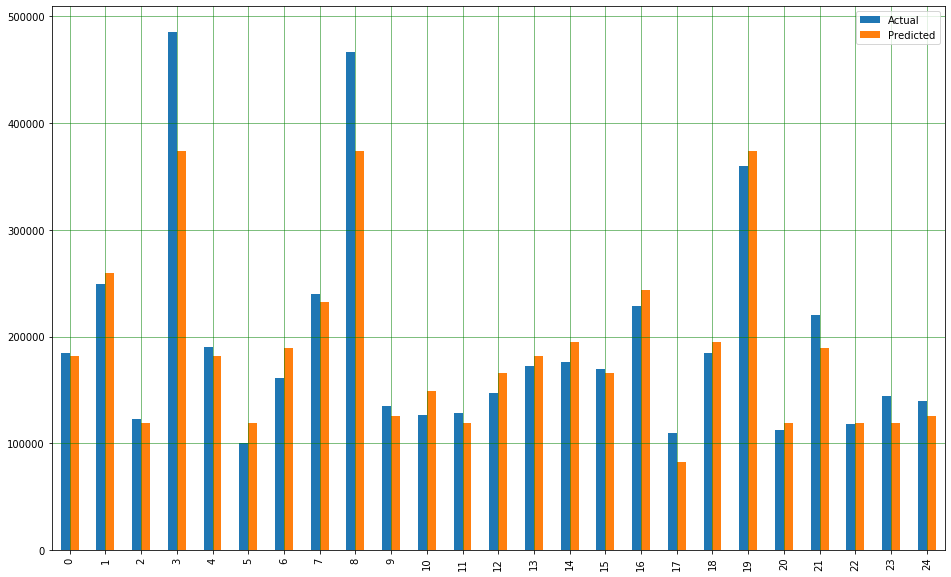

In [69]:
df1 = pd.DataFrame({'Actual': y_test_numpy,'Predicted':predict.flatten()})
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [79]:
mlp = MLPRegressor(hidden_layer_sizes=(5,),activation='relu',solver='adam',learning_rate='adaptive',max_iter=5000,learning_rate_init=0.01,alpha=0.01)
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_test)
print('prediction:',str(predictions[4]).strip('[').strip(']'))
print('r2 score: %.2f' % r2_score(y_test,predictions))
mrs = r2_score(y_test,predictions)
accuracy = mlp.score(x_test, y_test)
print(accuracy*100,'%')
y_test_nu = y_test['SalePrice'].to_numpy()
dfl=pd.DataFrame({'Actual':y_test_nu, 'Predicted':predictions})
dfl

prediction: 195219.91010490485
Mean squared error: 1474714973.90
Variance score: 0.76
76.35854581981454 %


,Actual,Predicted
0,185000,195255.629561
1,248900,248189.685014
2,122500,161538.863238
3,485000,348419.830827
4,190000,195219.910105
5,99900,75306.840755
6,161000,147052.731824
7,240000,232489.543255
8,466500,374368.077470
9,135000,130673.747272


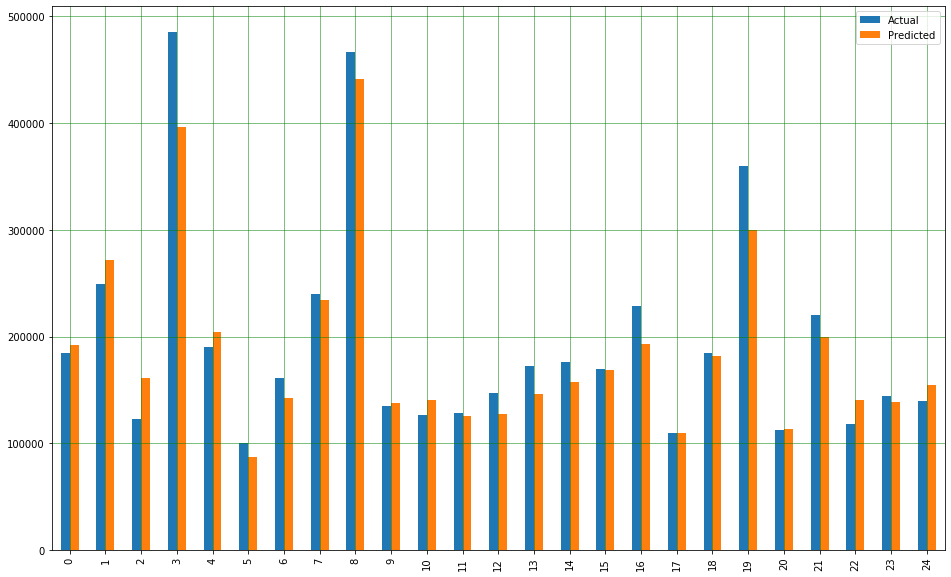

In [70]:
df1 = pd.DataFrame({'Actual': y_test_nu,'Predicted':predictions.flatten()})
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

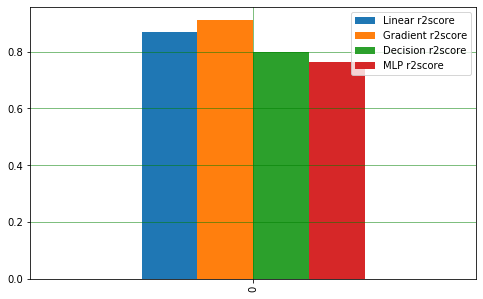

In [81]:
df5 = pd.DataFrame({'Linear r2score': lrs,'Gradient r2score':grs,'Decision r2score':drs,'MLP r2score':mrs.flatten()})
df5.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()